In [1]:
#Importing the packages I need.
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [47]:
#importing my data for the analysis
data = pd.read_csv(r'C:\Users\SOLOMON\Desktop\wendel\Kaggle\Heart-Failure_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [48]:
#Checking the statistics of the data
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [49]:
#Checking for null values in the data
nulls = data.isnull().sum()
nulls

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

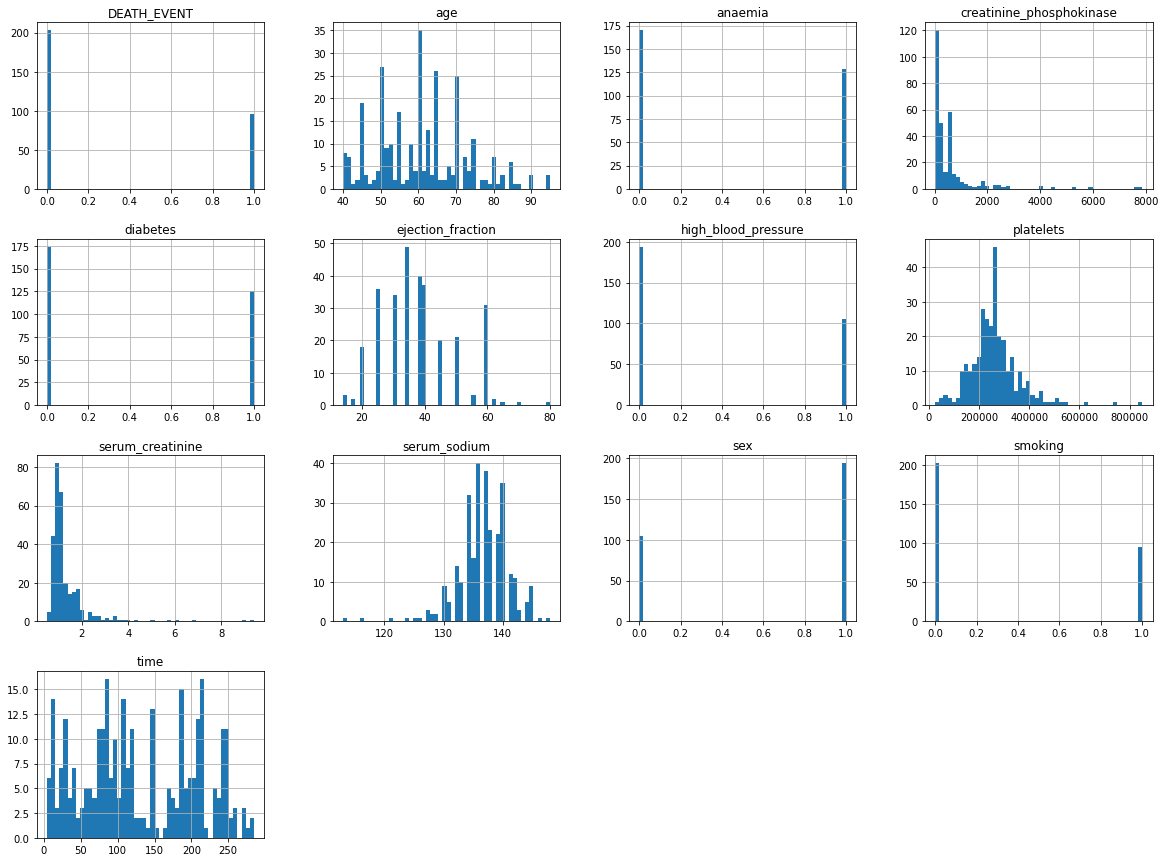

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [50]:
#Check distribution of various columns
data.hist(bins=50, figsize=(20,15))
plt.show()
data.head()

In [51]:
#filling NaN values with zeros
data.fillna(0)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [52]:
X_train = data[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
Y_train = data['DEATH_EVENT']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

In [54]:
train_x,test_x,train_y,test_y = train_test_split(X_train,Y_train,test_size = 0.3,random_state = 10)

In [59]:
model1 = RandomForestClassifier()
model1.fit(train_x,train_y)
predicted_y = model1.predict(test_x)
accuracy = accuracy_score(test_y,predicted_y)
fbeta_1 = fbeta_score(test_y,predicted_y,beta=1.5)

In [70]:
print('The RandomForestClassifier model has accuracy: ' + str(accuracy) + '\n' 'fbeta score:' + str(fbeta_1))

The RandomForestClassifier model has accuracy: 0.8222222222222222
fbeta score:0.7046070460704608


In [76]:
model2 = SVC()
model2.fit(train_x,train_y)
model2_pred_y = model2.predict(test_x)
accuracy2 = accuracy_score(test_y,model2_pred_y)
fbeta_2 = fbeta_score(test_y,model2_pred_y,beta=1.5)
print('The SVC model has accuracy: ' + str(accuracy2) + '\n' 'fbeta score:' + str(fbeta_2))

The SVC model has accuracy: 0.6777777777777778
fbeta score:0.0


In [81]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(train_x,train_y)
model3_pred = model3.predict(test_x)
accuracy3 = accuracy_score(test_y,model3_pred)
fbeta_3 = fbeta_score(test_y,model3_pred,beta=1.5)
print('The Logistic Regression model has accuracy: ' + str(accuracy3) + '\n' 'fbeta score:' + str(fbeta_3))

The Logistic Regression model has accuracy: 0.8
fbeta score:0.6693766937669375


In [86]:
print('Obviously from all three models it is clear the Random Forest Classifier model performs better on the dataset')
print('Thank You!')

Obviously from all three models it is clear the Random Forest Classifier model performs better on the dataset
Thank You!
